# <center>Diabetes Disease Detection</center>

## Overview:
Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Glucose is your body’s main source of energy. Your body can make glucose, but glucose also comes from the food you eat. Insulin is a hormone made by the pancreas that helps glucose get into your cells to be used for energy. If you have diabetes, your body doesn’t make enough—or any—insulin, or doesn’t use insulin properly. Glucose then stays in your blood and doesn’t reach your cells. Diabetes raises the risk for damage to the eyes, kidneys, nerves, and heart. Diabetes is also linked to some types of cancer.

## Dataset Information:
PIMA Indian Dataset: [Kaggle - Diabetes Disease Detection](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

### Independent Feature:
* Outcome

### Dependent Feature:
* Pregnancies	
* Glucose	
* BloodPressure	
* SkinThickness	
* Insulin	
* BMI	
* DiabetesPedigreeFunction	
* Age

### Training : Testing :: 800 : 200 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [2]:
df = pd.read_csv('Data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df["Outcome"].value_counts()

class_0 = df[df["Outcome"]==0]
class_1 = df[df["Outcome"]==1]

In [4]:
class_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [5]:
class_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [6]:
df_n = class_1.sample(500, replace=True)

df = pd.concat([class_0, df_n], axis=0)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
72,13,126,90,0,0,43.4,0.583,42,1
177,0,129,110,46,130,67.1,0.319,26,1
455,14,175,62,30,0,33.6,0.212,38,1
484,0,145,0,0,0,44.2,0.630,31,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 356
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   int64  
 2   BloodPressure             1000 non-null   int64  
 3   SkinThickness             1000 non-null   int64  
 4   Insulin                   1000 non-null   int64  
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
 8   Outcome                   1000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 78.1 KB


In [8]:
features = df.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.099000,127.114000,69.473000,20.69800,85.087,32.509000,0.488880,34.604000,0.50000
std,3.466297,33.358954,19.494083,16.57237,124.321,7.879823,0.349517,11.952659,0.50025
min,0.000000,0.000000,0.000000,0.00000,0.000,0.000000,0.078000,21.000000,0.00000
25%,1.000000,102.000000,64.000000,0.00000,0.000,27.800000,0.247000,25.000000,0.00000
50%,3.000000,122.500000,72.000000,23.00000,14.000,32.750000,0.391000,31.000000,0.50000
75%,7.000000,151.000000,80.000000,33.00000,140.000,36.600000,0.647000,42.000000,1.00000
max,17.000000,199.000000,122.000000,99.00000,846.000,67.100000,2.420000,81.000000,1.00000


In [10]:
categorical_columns = []
numerical_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

In [11]:
print("Numerical Features: ",numerical_columns)

print("\nCategorical Features: ",categorical_columns)

Numerical Features:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Categorical Features:  []


In [12]:
discrete_features=[feature for feature in numerical_columns if len(df[feature].unique())<25]
continuous_features=[feature for feature in numerical_columns if feature not in discrete_features]

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

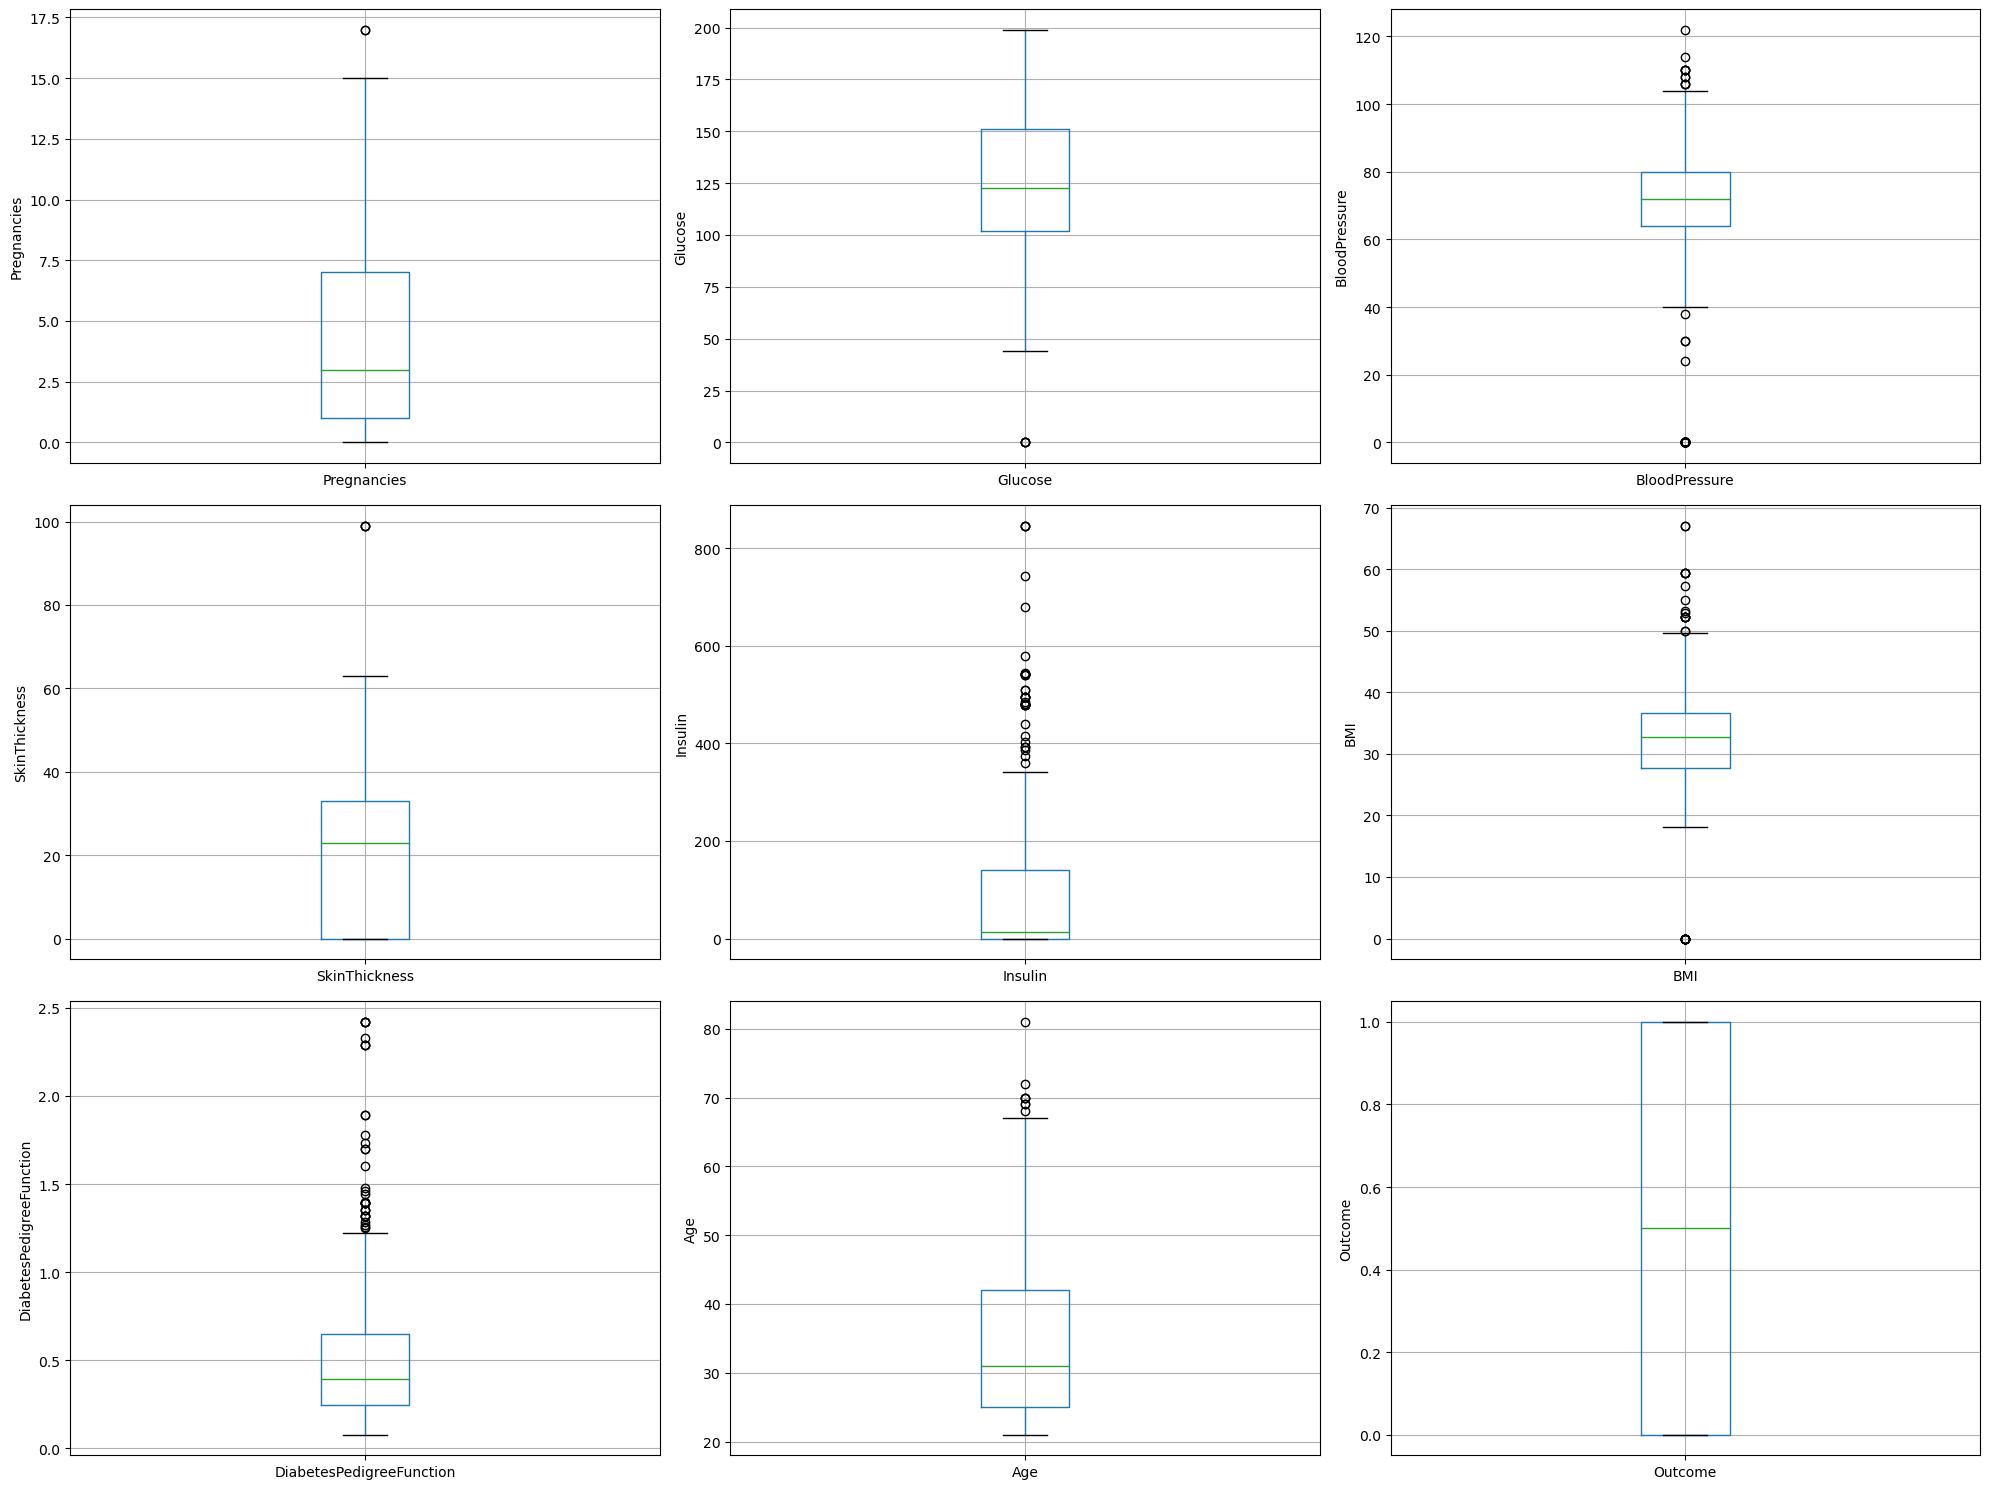

In [14]:
fig, axes = plt.subplots(3,3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_ylabel(col)

for j in range(len(df.columns), 3,3):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [15]:
for feature in continuous_features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_limit = df[feature].quantile(0.25) - (IQR * 3)
    upper_limit = df[feature].quantile(0.75) + (IQR * 3)
    df.loc[df[feature] >= upper_limit, feature] = upper_limit
    df.loc[df[feature] < lower_limit, feature] = lower_limit

In [16]:
x =  df.drop(columns=['Outcome'],axis=1)
y = df['Outcome']

In [17]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [18]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=40,stratify=df['Outcome'])

In [19]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=20, max_depth=10),
    'XG Boost': XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52, colsample_bytree=0.6, seed=27,
                              reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5),
    'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=10),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6),
    'Support Vector Machine': SVC(kernel='rbf', C=2, probability=True),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier()
}

In [20]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)

    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Testing Accuracy: ", test_accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1 Score: ",f1)


    model_list.append(model_name)
    accuracy_list.append(test_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print("=" * 35)

max_accuracy_index = accuracy_list.index(max(accuracy_list))
print(f"The best model based on accuracy is {model_list[max_accuracy_index]} with Testing Accuracy: {accuracy_list[max_accuracy_index]}")

Model: Logistic Regression
Testing Accuracy:  0.685
Precision:  0.6907216494845361
Recall:  0.67
F1 Score:  0.6802030456852791
Model: Naive Bayes
Testing Accuracy:  0.715
Precision:  0.7311827956989247
Recall:  0.68
F1 Score:  0.7046632124352332
Model: Random Forest Classifier
Testing Accuracy:  0.85
Precision:  0.7916666666666666
Recall:  0.95
F1 Score:  0.8636363636363635
Model: XG Boost
Testing Accuracy:  0.755
Precision:  0.7256637168141593
Recall:  0.82
F1 Score:  0.7699530516431924
Model: K Nearest Neighbors
Testing Accuracy:  0.71
Precision:  0.7142857142857143
Recall:  0.7
F1 Score:  0.7070707070707072
Model: Decision Tree
Testing Accuracy:  0.76
Precision:  0.7131147540983607
Recall:  0.87
F1 Score:  0.7837837837837837
Model: Support Vector Machine
Testing Accuracy:  0.76
Precision:  0.7363636363636363
Recall:  0.81
F1 Score:  0.7714285714285715
Model: AdaBoost Classifier
Testing Accuracy:  0.775
Precision:  0.7433628318584071
Recall:  0.84
F1 Score:  0.7887323943661971
Model:

In [27]:
best_model = models['Extra Trees Classifier']
pickle.dump(best_model,open('Diabetes_Model.pkl','wb'))
pickle.dump(scaler,open('Diabetes_Preprocessor.pkl','wb'))